<a href="https://colab.research.google.com/github/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Movement/blob/main/TISCO__ML_Project_R01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Libraries***

In [ ]:
!pip install pendulum
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
!pip install ta

In [2]:
# Import the Libraries

# Data Manupulation
import numpy as np
import pandas as pd
import pendulum
import scipy.stats as stats
from datetime import datetime, timedelta

# Techinical Indicators
import talib
import ta

# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Normalization
from sklearn.preprocessing import MinMaxScaler

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.model_selection import learning_curve

# Financial Data
import yfinance as yf

import requests
import warnings

## ***Read CSV File***


In [3]:
# Stock
## TISCO
TISCO_15m = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/tisco_15m.csv')

## ERW
ERW_15m = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/erw_15m.csv')

## SPRC
SPRC_15m = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/sprc_15m.csv')

# Features
BANKING = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/banking_15m.csv')
BRENT = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/brent_15m.csv')
CNY = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/cny_15m.csv')
CRUDE = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/crude_15m.csv')
ENERGY = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/energy_15m.csv')
FINCIAL = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/fincial_15m.csv')
GOLD = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/gold_15m.csv')
RESOURCE = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/resource_15m.csv')
SERVICE = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/service_15m.csv')
SET50 = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/set50_15m.csv')
SET100 = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/set100_15m.csv')
TOURISM = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/tourism_15m.csv')
USD = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/usd_15m.csv')
BCP = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/bcp_15m.csv')
TOP = pd.read_csv('https://raw.githubusercontent.com/AuntiesSnail/DADS6003-Prediction-of-Stock-Price-Trend/main/Stock_Dataset/top_15m.csv')


## ***Data Collection & Preprocessing***

In [ ]:
# List of stock symbols
stock_symbols = ['TISCO.BK', 'ERW.BK', 'SPRC.BK',
                 'THB=X', 'CNY=X', 'GC=F', 'BZ=F', 'CL=F',
                 'BSET100.BK', 'TDEX.BK', 'TOP.BK',  'BCP.BK',
                 '^FINCIAL.BK', '^BANK.BK', '^SERVICE.BK', '^TOURISM.BK', '^RESOURC.BK', '^ENERG.BK']

# Stock Symbol Categories
symbol_categories = {
    'BANKING': ['^BANK.BK'],
    'BRENT': ['BZ=F'],
    'CNY': ['CNY=X'],
    'CRUDE': ['CL=F'],
    'ENERGY': ['^ENERG.BK'],
    'FINCIAL': ['^FINCIAL.BK'],
    'GOLD': ['GC=F'],
    'RESOURCE': ['^RESOURC.BK'],
    'SERVICE': ['^SERVICE.BK'],
    'SET50': ['TDEX.BK'],
    'SET100': ['BSET100.BK'],
    'TOURISM': ['^TOURISM.BK'],
    'USD': ['THB=X'],
    'ERW': ['ERW.BK'],
    'TISCO': ['TISCO.BK'],
    'SPRC': ['SPRC.BK'],
    'IRPC': ['IRPC.BK'],
    'TOP': ['TOP.BK'],
    'BCP': ['BCP.BK'],
}

# Time Zone and Date Range
bkk_tz = 'Asia/Bangkok'
end_date = pendulum.now(bkk_tz).strftime('%Y-%m-%d')
start_date = (pendulum.now(bkk_tz) - pendulum.duration(days=59)).strftime('%Y-%m-%d')
interval = '15m'

# Data Integration and Aggregation
banking_data = []
brent_data = []
cny_data = []
crude_data = []
energy_data = []
fincial_data = []
gold_data = []
resource_data = []
service_data = []
set50_data = []
set100_data = []
tourism_data = []
usd_data = []
erw_data = []
tisco_data = []
sprc_data = []
irpc_data = []
top_data = []
bcp_data = []

for category, symbols in symbol_categories.items():
    print(f"\nProcessing data for category: {category}")

    for symbol in symbols:
        try:
            hist_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
            hist_data = hist_data.between_time('10:00', '16:30')
            locals()[f"{category.lower()}_data"].append(hist_data)
        except Exception as e:
            print(f"Failed to download data for '{symbol}': {e}")

# Convert each list to a DataFrame
bank = pd.concat(banking_data).reset_index()
brent = pd.concat(brent_data).reset_index()
cny = pd.concat(cny_data).reset_index()
crude = pd.concat(crude_data).reset_index()
energy = pd.concat(energy_data).reset_index()
fincial = pd.concat(fincial_data).reset_index()
gold = pd.concat(gold_data).reset_index()
resource = pd.concat(resource_data).reset_index()
service = pd.concat(service_data).reset_index()
set50 = pd.concat(set50_data).reset_index()
set100 = pd.concat(set100_data).reset_index()
tour = pd.concat(tourism_data).reset_index()
usd = pd.concat(usd_data).reset_index()
erw = pd.concat(erw_data).reset_index()
tisco = pd.concat(tisco_data).reset_index()
sprc = pd.concat(sprc_data).reset_index()
irpc = pd.concat(irpc_data).reset_index()
top = pd.concat(top_data).reset_index()
bcp = pd.concat(bcp_data).reset_index()

## Features: Stock Market Index

In [5]:
# Features (X)
tisco_close = tisco['Close']
erw_close = erw['Close']
sprc_close = sprc['Close']
tisco_vol = tisco['Volume']
erw_vol = erw['Volume']
sprc_vol = sprc['Volume']
usd = usd['Close']
cny = cny['Close']
set100 = set100['Close']
set50 = set50['Close']
gold = gold['Close']
fin = fincial['Close']
bank = bank['Close']
service = service['Close']
tour = tour['Close']
resource = resource['Close']
energy = energy['Close']
crude_brent = brent['Close']
crude_wti = crude['Close']
bcp = bcp['Close']
top = top['Close']


# ***Model: TISCO***

In [6]:
tisco.info

<bound method DataFrame.info of                Datetime    Open    High     Low   Close  Adj Close  Volume
0   2023-11-16 10:00:00   97.50   97.50   97.00   97.25      97.25  107526
1   2023-11-16 10:15:00   97.25   97.50   97.25   97.50      97.50   12823
2   2023-11-16 10:30:00   97.50   97.50   97.00   97.25      97.25  188991
3   2023-11-16 10:45:00   97.00   97.25   97.00   97.25      97.25  223111
4   2023-11-16 11:00:00   97.25   97.50   97.00   97.25      97.25   98923
..                  ...     ...     ...     ...     ...        ...     ...
698 2024-01-12 15:15:00  100.50  101.00  100.50  101.00     101.00   32261
699 2024-01-12 15:30:00  101.00  101.00  100.50  101.00     101.00   51658
700 2024-01-12 15:45:00  101.00  101.00  100.50  101.00     101.00   87328
701 2024-01-12 16:00:00  101.00  101.00  100.50  101.00     101.00   57612
702 2024-01-12 16:15:00  100.50  101.00  100.50  100.50     100.50  630573

[703 rows x 7 columns]>

### Define Variables and Target (y)

In [7]:
# Add New Feature
tisco['Close_Shift'] = tisco['Close'].shift(-1)
tisco['Close_Shift'] = tisco['Close_Shift'].fillna(method='ffill')

## Label (y)
# Create target variable
tisco['Signal'] = np.where(tisco['Close_Shift'] > tisco['Close'], 1, -1)

In [8]:
tisco[['Close','Close_Shift','Signal']]

,Close,Close_Shift,Signal
0,97.25,97.50,1
1,97.50,97.25,-1
2,97.25,97.25,-1
3,97.25,97.25,-1
4,97.25,97.25,-1
...,...,...,...
698,101.00,101.00,-1
699,101.00,101.00,-1
700,101.00,101.00,-1
701,101.00,100.50,-1


In [9]:
tisco_signal = tisco['Signal']

# Reference date
ref_date = tisco['Datetime']

In [ ]:
# Select Stock and Index
tisco_df = pd.DataFrame({'Datetime': tisco['Datetime'], 'Signal': tisco['Signal'], 'tisco_high': tisco['High'],'tisco_low': tisco['Low'],'tisco_close': tisco['Close'], 'tisco_vol': tisco['Volume']})
usd_df = pd.DataFrame({'Datetime': ref_date, 'usd_close': usd})
cny_df = pd.DataFrame({'Datetime': ref_date, 'cny_close': cny})
set100_df = pd.DataFrame({'Datetime': ref_date, 'set100_close': set100})
set50_df = pd.DataFrame({'Datetime': ref_date, 'set50_close': set50})
gold_df = pd.DataFrame({'Datetime': ref_date, 'gold_close': gold})
bank_df = pd.DataFrame({'Datetime': ref_date, 'bank_close': bank})
fincial_df = pd.DataFrame({'Datetime': ref_date, 'fincial_close': fin})


# Merge all DataFrames on the 'Datetime' column
tisco_merged = pd.merge(tisco_df, usd_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, cny_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, set100_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, set50_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, gold_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, bank_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, fincial_df, on='Datetime', how='left')



# Display the merged DataFrame
print(tisco_merged)

In [ ]:
# Check Null values
nan_count = tisco_merged.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

In [13]:
# Fill Null Values
tisco_merged.fillna(method = 'ffill', inplace = True)

In [ ]:
# Check Null values after fill
nan_count = tisco_merged.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

### Check Normality & Skewness

In [15]:
column_names_list = list(tisco_merged.columns)
print(column_names_list)

['Datetime', 'Signal', 'tisco_high', 'tisco_low', 'tisco_close', 'tisco_vol', 'usd_close', 'cny_close', 'set100_close', 'set50_close', 'gold_close', 'bank_close', 'fincial_close']


In [ ]:
## Check Skewness

columns = ['tisco_high', 'tisco_low', 'tisco_close', 'tisco_vol', 'usd_close', 'cny_close', 'set100_close', 'set50_close', 'gold_close', 'bank_close', 'fincial_close']

fig, axs = plt.subplots(9, 2, figsize=(12,18))

axs = axs.flatten()

for i, column in enumerate(columns):
    axs[i].hist(tisco_merged[column], bins=20, color='salmon', edgecolor='black')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {column}')

    mean_val = tisco_merged[column].mean()
    median_val = tisco_merged[column].median()

    axs[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
    axs[i].axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
    axs[i].legend()

# Hide any unused subplots
for i in range(len(columns), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Check Outliers
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

color = 'pink'

for i, column in enumerate(columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x= tisco_merged[column], color=color)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
# Check normality using Anderson-Darling test

for column_name in columns:
    df_tmp = tisco_merged[[column_name]].dropna()

    print(f'{column_name} : ', end='')

    # Perform Anderson-Darling test for normality
    statistic, critical_values, significance_levels = stats.anderson(df_tmp[column_name], dist='norm')
    print(f'Statistic: {statistic:.3f}, Critical Values: {critical_values}, Significance Levels: {significance_levels}')

    # Check normality based on the 5% significance level
    if statistic >= critical_values[2]:
        print('Not normal')
    else:
        print('Normal')

    print('--------------------------------------------------------------')

### Features: Technical Indicator

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original data
tisco_data = tisco_merged.copy()

# Technical Indicators Features
tisco_data['sma_10'] = ta.trend.sma_indicator(close=tisco_data['tisco_close'], window=10)
tisco_data['ema_5'] = ta.trend.ema_indicator(close=tisco_data['tisco_close'], window=5)
tisco_data['ema_10'] = ta.trend.ema_indicator(close=tisco_data['tisco_close'], window=10)
tisco_data['ema_20'] = ta.trend.ema_indicator(close=tisco_data['tisco_close'], window=20)
tisco_data['rsi_5'] = ta.momentum.RSIIndicator(close=tisco_data['tisco_close'], window=5).rsi()
tisco_data['rsi_14'] = ta.momentum.RSIIndicator(close=tisco_data['tisco_close'], window=14).rsi()
tisco_data['ema_20'] = ta.trend.ema_indicator(close=tisco_data['tisco_close'], window=20)
tisco_data['roc'] = ta.momentum.ROCIndicator(close=tisco_data['tisco_close'], window=10).roc()
tisco_data['sto'] = ta.momentum.StochasticOscillator(close=tisco_data['tisco_close'], high =tisco_data['tisco_high'],low=tisco_data['tisco_low'],window=10,smooth_window=3).stoch()
tisco_data['obv'] = ta.volume.OnBalanceVolumeIndicator(close=tisco_data['tisco_close'], volume=tisco_data['tisco_vol']).on_balance_volume()
tisco_data['atr'] = ta.volatility.AverageTrueRange(high =tisco_data['tisco_high'], low=tisco_data['tisco_low'], close=tisco_data['tisco_close'], window=10).average_true_range()
tisco_data['bb_upper'], tisco_data['bb_medium'], tisco_data['bb_lower'] = ta.volatility.bollinger_hband(close=tisco_data['tisco_close'], window=20), ta.volatility.bollinger_mavg(close=tisco_data['tisco_close'], window=20), ta.volatility.bollinger_lband(close=tisco_data['tisco_close'], window=20)

tisco_data.dropna(inplace = True)
tisco_data.info()


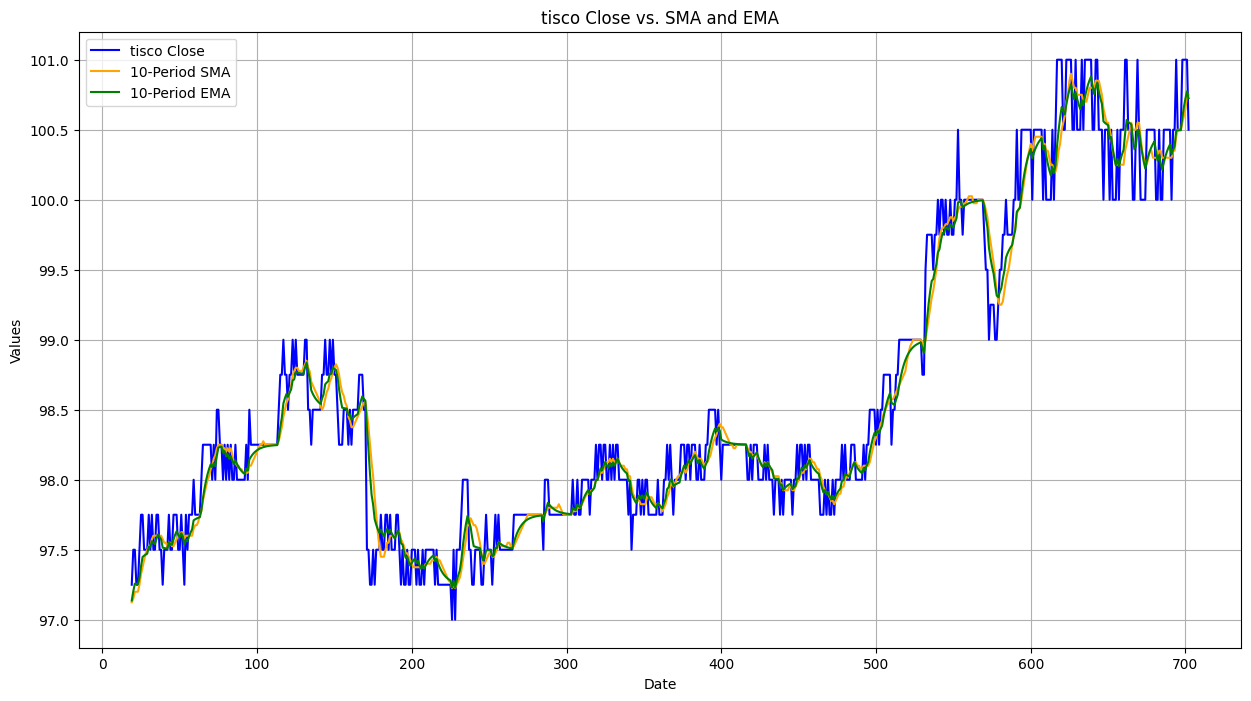

In [21]:
import matplotlib.pyplot as plt

if all(column in tisco_data.columns for column in ['tisco_close', 'sma_10', 'ema_10']):
    # Plotting the data
    plt.figure(figsize=(15, 8))
    plt.plot(tisco_data['tisco_close'], label='tisco Close', color='blue')
    plt.plot(tisco_data['sma_10'], label='10-Period SMA', color='orange')
    plt.plot(tisco_data['ema_10'], label='10-Period EMA', color='green')

    # Adding title and labels
    plt.title('tisco Close vs. SMA and EMA')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("Error: Necessary columns not found in DataFrame.")


In [ ]:
tisco_corr = tisco_data.corr()['tisco_close']

print("Correlation with tisco15_close:")
print(tisco_corr)

print("\nInterpretation:")
for variable, correlation in tisco_corr.items():
    if correlation > 0.7 or correlation < -0.7:
        print(f"The correlation between 'tisco15_close' and '{variable}' is strong ({correlation:.2f})")
    elif 0.3 <= correlation <= 0.7 or -0.7 <= correlation <= -0.3:
        print(f"The correlation between 'tisco15_close' and '{variable}' is moderate ({correlation:.2f})")
    elif 0.1 <= correlation <= 0.3 or -0.3 <= correlation <= -0.1:
        print(f"The correlation between 'tisco15_close' and '{variable}' is weak ({correlation:.2f})")
    else:
        print(f"There is no significant correlation between 'tisco15_close' and '{variable}' ({correlation:.2f})")

In [ ]:
plt.figure(figsize=(20, 18))
sns.heatmap(tisco_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heat Map of tisco and its Features')

plt.show()

Principal Component Analysis (PCA)

In [23]:
tisco_data.columns

Index(['Datetime', 'Signal', 'tisco_high', 'tisco_low', 'tisco_close',
       'tisco_vol', 'usd_close', 'cny_close', 'set100_close', 'set50_close',
       'gold_close', 'bank_close', 'fincial_close', 'sma_10', 'ema_5',
       'ema_10', 'ema_20', 'rsi_5', 'rsi_14', 'roc', 'sto', 'obv', 'atr',
       'bb_upper', 'bb_medium', 'bb_lower'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler
# Specify the feature
feature_data = ['tisco_close', 'usd_close', 'gold_close', 'bank_close', 'fincial_close', 'sma_10', 'obv', 'atr','bb_medium']

tisco_features = tisco_data[feature_data]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(tisco_features)

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_data)

print("Explained variance by component:", pca.explained_variance_ratio_)

Explained variance by component: [0.65492159 0.15231731 0.10069042 0.03862002 0.02842134]


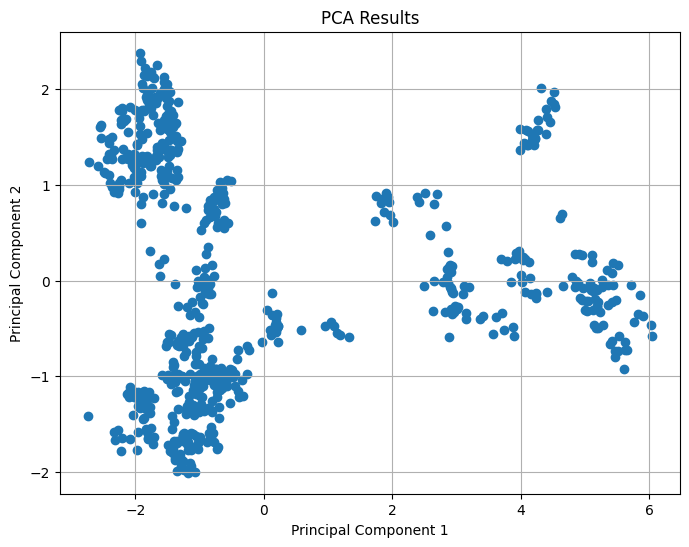

In [28]:
import matplotlib.pyplot as plt

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
# Get PCA loadings
loadings = pca.components_

# Display the loadings for each feature
for i, component in enumerate(loadings):
    print(f"Principal Component {i+1}:")
    for feature, loading in zip(feature_data, component):
        print(f"{feature}: {loading:.3f}")
    print()

### Normalization

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Specify feature
tisco_features = ['tisco_close', 'usd_close', 'gold_close', 'bank_close', 'fincial_close', 'sma_10', 'obv', 'atr','bb_medium']

scaler = MinMaxScaler()

# Fit the scaler to the data and transform the specified columns
tisco_data[tisco_features] = scaler.fit_transform(tisco_data[tisco_features])


### Split Dataset

In [75]:
X_train_df = tisco_data[tisco_features]
y_train_df = tisco_data['Signal']

In [76]:
y_train_df.isna().sum()

0

In [77]:
# Split data : train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state=123, stratify=y_train_df)


## ***Model Development***

In [78]:
## For Extreme Gradient Boosting (XGBoost) ###

y_train = y_train.map({1: 1, -1: 0})
y_train = y_train.values.ravel()

y_test = y_test.map({1: 1, -1: 0})
y_test = y_test.values.ravel()

k = 10
auc_scorer = make_scorer(roc_auc_score, greater_is_better = True, average= 'macro',multi_class='ovr',needs_proba=True)

In [34]:
# Set parameter
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

k = 10
auc_scorer = make_scorer(roc_auc_score, greater_is_better = True, average= 'macro',multi_class='ovr',needs_proba=True)


## 1. Logistic Regression

### Feature Selection

Fitting 10 folds for each of 40 candidates, totalling 400 fits


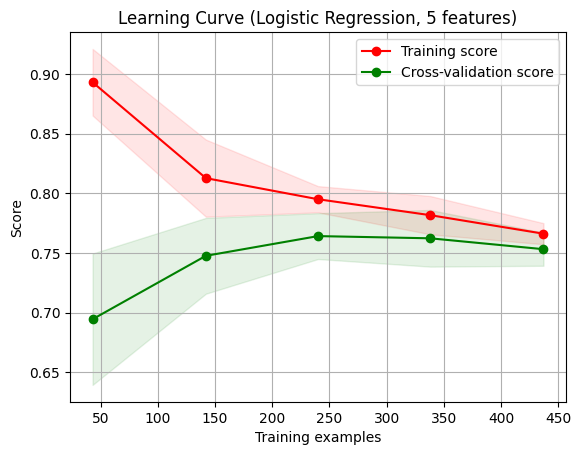

Fitting 10 folds for each of 40 candidates, totalling 400 fits


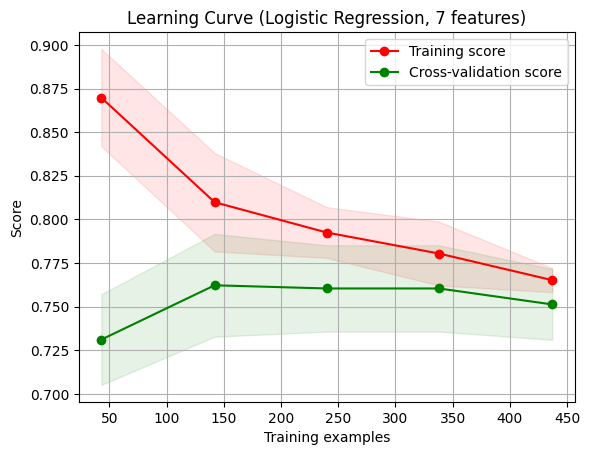

In [35]:

def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# lgr = LogisticRegression(solver='liblinear')
lgr = LogisticRegression(solver='saga', max_iter=10000)
feature_nums = [ 5, 7]

for num_features in feature_nums:
    # Use RFE for feature selection
    rfe = RFE(lgr, n_features_to_select=num_features)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_]

    # Update X_train to include only the selected features
    X_train_selected = X_train[selected_features]

    # Define the parameter grid for Logistic Regression
    param_grid_lgr = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}

    # Perform grid search with cross-validation
    grid_search_lgr = GridSearchCV(estimator=lgr, param_grid=param_grid_lgr, cv=k, scoring='roc_auc', return_train_score=False, verbose=1)
    grid_search_lgr.fit(X_train_selected, y_train)

    # Retrieve the best estimator from the grid search
    best_estimator = grid_search_lgr.best_estimator_

    # Plot learning curve for the current number of features using the best estimator from the grid search
    plot_learning_curve(best_estimator, X_train_selected, y_train,
                        title=f'Learning Curve (Logistic Regression, {num_features} features)')
    plt.show()



### Training

In [52]:
# Number of features to select:
feature = 5

#lgr = LogisticRegression(solver='liblinear')
lgr = LogisticRegression(solver='saga', max_iter=10000)

# Perform RFE for feature selection on the training set:
rfe = RFE(lgr, n_features_to_select=feature)
rfe.fit(X_train, y_train)

# Get the selected features from the training set:
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]

# Apply the same feature selection to the test set:
X_test_selected = X_test[X_train_selected.columns]

# Hyperparameter grid to search:
param_grid_lgr = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}

# Grid search with cross-validation
grid_search_lgr = GridSearchCV(estimator=lgr, param_grid=param_grid_lgr, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_lgr.fit(X_train_selected, y_train)


Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [53]:
X_train_selected.columns

Index(['tisco_close', 'gold_close', 'bank_close', 'obv', 'bb_medium'], dtype='object')

### Performance Evaluation (Test)

In [55]:
# Confusion Matrix
y_pred_lgr = grid_search_lgr.predict(X_test_selected)
conf_matrix_lgr = confusion_matrix(y_test, y_pred_lgr)

# AUC Score
y_prob_lgr = grid_search_lgr.predict_proba(X_test_selected)
auc_lgr = roc_auc_score(y_test, y_prob_lgr[:, 1]) * 100

# Print Confusion Matrix and AUC Score
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_lgr)
print(f"Logistic Regression AUC Score: {auc_lgr:.2f}%")

# Check overfitting or underfitting
y_train_pred = grid_search_lgr.predict(X_train_selected)
train_acc_lgr = accuracy_score(y_train, y_train_pred)
test_acc_lgr = accuracy_score(y_test, y_pred_lgr)

# Compare the metrics to diagnose overfitting or underfitting
if train_acc_lgr > test_acc_lgr:
   print("The model may be overfitting.")
elif train_acc_lgr < 0.5 and test_acc_lgr  < 0.5:
   print("The model may be underfitting.")
else:
   print("The model performance is balanced.")


Logistic Regression Confusion Matrix:
[[101   4]
 [ 27   5]]
Logistic Regression AUC Score: 70.18%
The model performance is balanced.


## 2. Support Vector Machine (SVM)

### Feature Selection

Fitting 10 folds for each of 3 candidates, totalling 30 fits


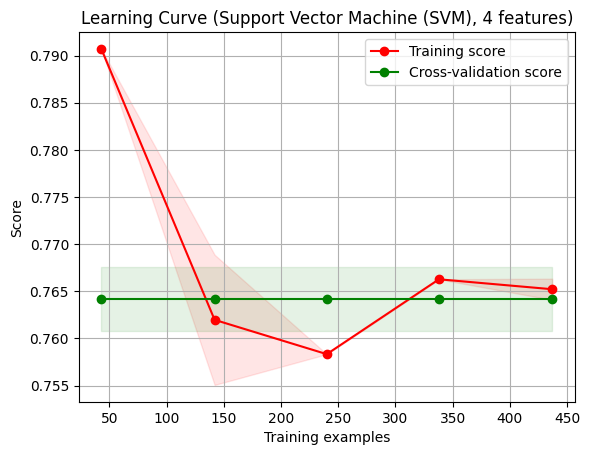

Fitting 10 folds for each of 3 candidates, totalling 30 fits


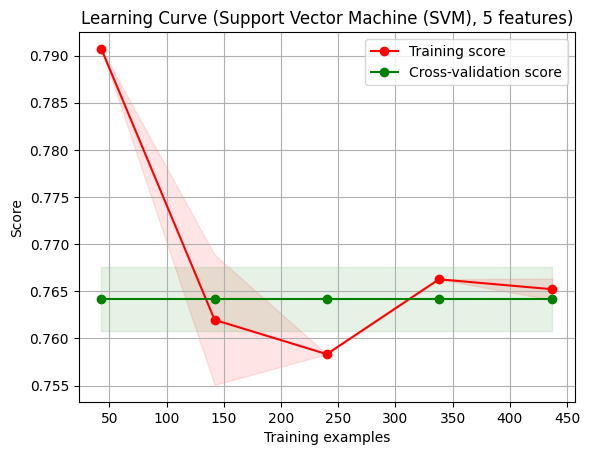

Fitting 10 folds for each of 3 candidates, totalling 30 fits


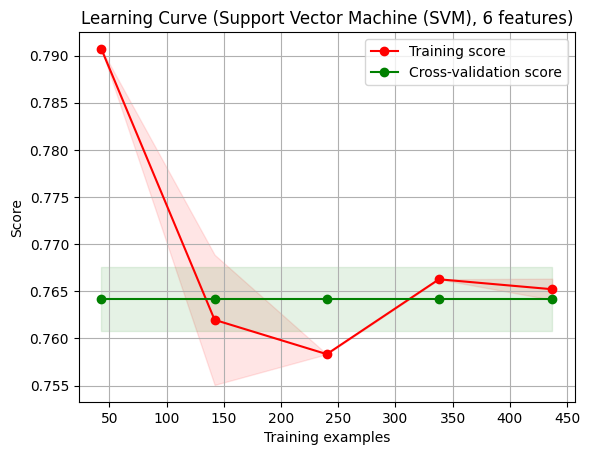

In [56]:

def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

svm = SVC(kernel='linear', probability=True)
feature_nums = [ 4, 5, 6]

for num_features in feature_nums:
    # Use RFE for feature selection
    rfe = RFE(svm, n_features_to_select=num_features)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_]

    # Update X_train to include only the selected features
    X_train_selected = X_train[selected_features]

    # Define the parameter grid for Logistic Regression
    param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear']}

    # Perform grid search with cross-validation
    grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
    grid_search_svm.fit(X_train_selected, y_train)

    # Retrieve the best estimator from the grid search
    best_estimator = grid_search_svm.best_estimator_

    # Plot learning curve for the current number of features using the best estimator from the grid search
    plot_learning_curve(best_estimator, X_train_selected, y_train,
                        title=f'Learning Curve (Support Vector Machine (SVM), {num_features} features)')
    plt.show()



### Training

In [57]:
# Number of features to select:
feature = 5

svm = SVC(kernel='linear',probability=True)

# Perform RFE for feature selection on the training set:
rfe = RFE(estimator=svm, n_features_to_select=feature)
rfe.fit(X_train, y_train)

# Get the selected features from the training set:
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]

# Apply the same feature selection to the test set:
X_test_selected = X_test[X_train_selected.columns]

# Hyperparameter grid to search:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear']}

# Grid search with cross-validation
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_svm.fit(X_train_selected, y_train)


Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [58]:
X_train_selected.columns

Index(['tisco_close', 'gold_close', 'bank_close', 'sma_10', 'atr'], dtype='object')

### Performance Evaluation (Test)

In [59]:

# Confusion Matrix
y_pred_svm = grid_search_svm.predict(X_test_selected)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# AUC Score
y_prob_svm = grid_search_svm.predict_proba(X_test_selected)
auc_svm = roc_auc_score(y_test, y_prob_svm[:, 1]) * 100

# Print Confusion Matrix and AUC Score
print("\nSupport Vector Machine (SVM) Confusion Matrix:")
print(conf_matrix_lgr)
print(f"Support Vector Machine (SVM) AUC Score: {auc_lgr:.2f}%")

# Check overfitting or underfitting
y_train_pred = grid_search_svm.predict(X_train_selected)
train_acc_svm = accuracy_score(y_train, y_train_pred)
test_acc_svm = accuracy_score(y_test, y_pred_svm)

# Compare the metrics to diagnose overfitting or underfitting
if train_acc_svm > test_acc_svm:
   print("The model may be overfitting.")
elif train_acc_svm < 0.5 and test_acc_svm  < 0.5:
   print("The model may be underfitting.")
else:
   print("The model performance is balanced.")


Support Vector Machine (SVM) Confusion Matrix:
[[101   4]
 [ 27   5]]
Support Vector Machine (SVM) AUC Score: 70.18%
The model performance is balanced.


## 3. Random Forest

### Feature Selection

Fitting 10 folds for each of 36 candidates, totalling 360 fits


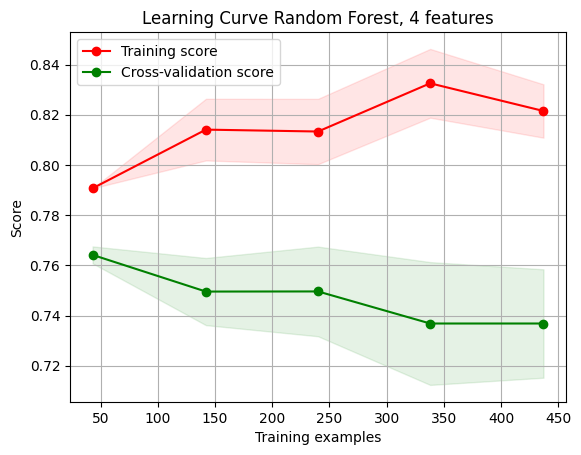

Fitting 10 folds for each of 36 candidates, totalling 360 fits


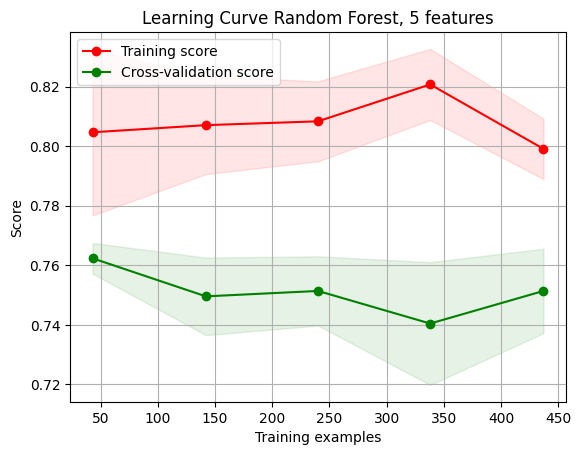

Fitting 10 folds for each of 36 candidates, totalling 360 fits


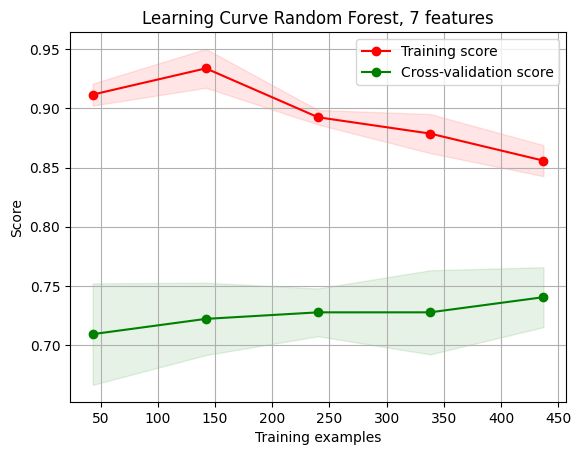

In [60]:

def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
feature_nums = [4, 5, 7]

for num_features in feature_nums:
    # Use RFE for feature selection
    rfe = RFE(rf, n_features_to_select=num_features)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_]

    # Update X_train_selected to include only the selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Define the parameter grid for Random Forest
    param_grid_rf = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform grid search with cross-validation
    grid_search_rf = GridSearchCV(
        estimator=rf,
        param_grid=param_grid_rf,
        cv=k,
        scoring=auc_scorer,
        return_train_score=False,
        verbose=1
    )
    grid_search_rf.fit(X_train_selected, y_train)

    # Retrieve the best estimator from the grid search
    best_estimator = grid_search_rf.best_estimator_

    # Plot learning curve
    plot_learning_curve(
        best_estimator,
        X_train_selected,
        y_train,
        title=f'Learning Curve Random Forest, {num_features} features'
    )
    plt.show()


### Training

In [73]:
# Number of features to select:
feature = 7

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform RFE for feature selection on the training set:
rfe = RFE(estimator=rf, n_features_to_select=feature)
rfe.fit(X_train, y_train)

# Get the selected features from the training set:
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]

# Apply the same feature selection to the test set:
X_test_selected = X_test[X_train_selected.columns]

# Hyperparameter grid to search:
param_grid_rf = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=k,  # Ensure 'k' is defined, e.g., k = 5 or k = StratifiedKFold(n_splits=5)
    scoring=auc_scorer,  # Ensure 'auc_scorer' is defined, or use a string like 'roc_auc'
    return_train_score=False,
    verbose=1
)

# Fit the grid search on the training data with selected features
grid_search_rf.fit(X_train_selected, y_train)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [71]:
X_train_selected.columns

Index(['gold_close', 'bank_close', 'fincial_close', 'obv', 'atr'], dtype='object')

### Performance Evaluation

In [72]:
X_test_selected = X_test[selected_features]

# Confusion Matrix
y_pred_rf = grid_search_rf.predict(X_test_selected)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# AUC Score
y_prob_rf = grid_search_rf.predict_proba(X_test_selected)
auc_rf = roc_auc_score(y_test, y_prob_rf[:, 1]) * 100

# Print Confusion Matrix and AUC Score
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_lgr)
print(f"Random Forest  AUC Score: {auc_rf:.2f}%")

# Check overfitting or underfitting
y_train_pred = grid_search_rf.predict(X_train_selected)
train_acc_rf = accuracy_score(y_train, y_train_pred)
test_acc_rf = accuracy_score(y_test, y_pred_rf)

# Compare the metrics to diagnose overfitting or underfitting
if train_acc_rf > test_acc_rf:
   print("The model may be overfitting.")
elif train_acc_rf < 0.5 and test_acc_rf < 0.5:
   print("The model may be underfitting.")
else:
   print("The model performance is balanced.")


Random Forest Confusion Matrix:
[[101   4]
 [ 27   5]]
Random Forest  AUC Score: 45.98%
The model may be overfitting.


## 4. Extreme Gradient Boosting (XGBoost)

### Feature Selection

Fitting 10 folds for each of 27 candidates, totalling 270 fits


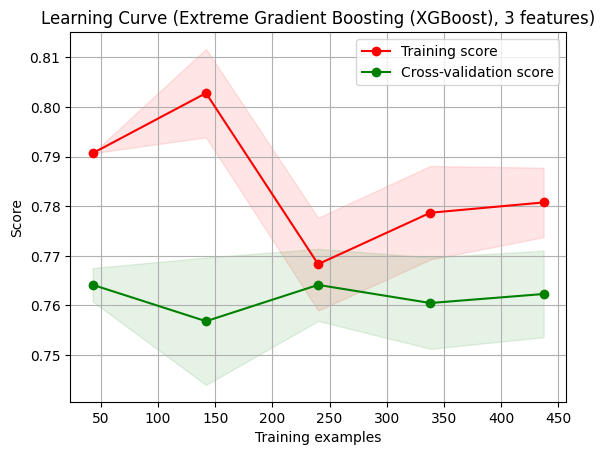

Fitting 10 folds for each of 27 candidates, totalling 270 fits


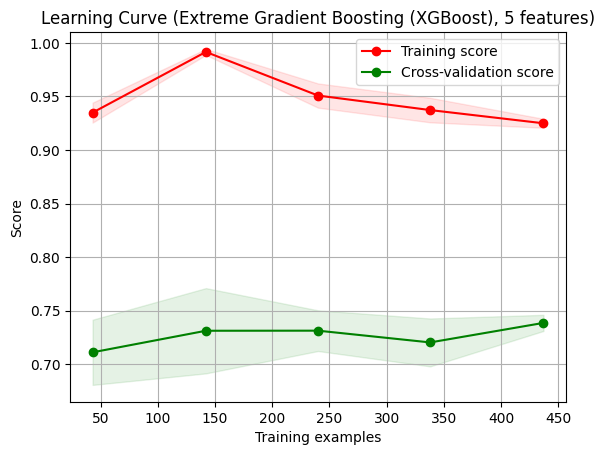

Fitting 10 folds for each of 27 candidates, totalling 270 fits


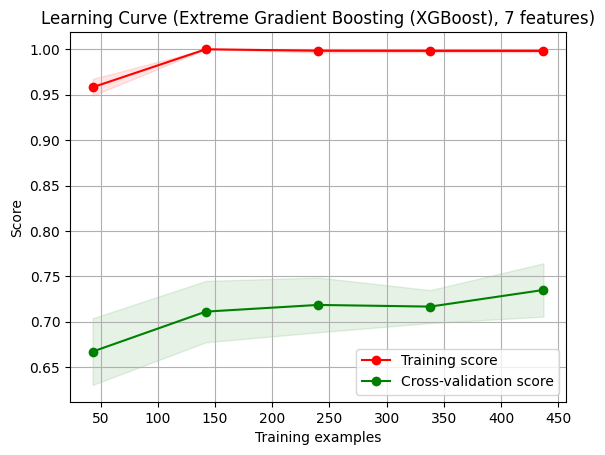

In [79]:
from xgboost import XGBClassifier
def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
feature_nums = [3, 5, 7]

for num_features in feature_nums:
    # Use RFE for feature selection
    rfe = RFE(xgb_model, n_features_to_select=num_features)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_]

    # Update X_train to include only the selected features
    X_train_selected = X_train[selected_features]

    # Define the parameter grid for Logistic Regression
    param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

    # Perform grid search with cross-validation
    grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
    grid_search_xgb.fit(X_train_selected, y_train)

    # Retrieve the best estimator from the grid search
    best_estimator = grid_search_xgb.best_estimator_

    # Plot learning curve for the current number of features using the best estimator from the grid search
    plot_learning_curve(best_estimator, X_train_selected, y_train,
                        title=f'Learning Curve (Extreme Gradient Boosting (XGBoost), {num_features} features)')
    plt.show()



### Training

In [80]:
# Number of features to select:
feature = 4

xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)

# Perform RFE for feature selection on the training set:
rfe = RFE(xgb_model, n_features_to_select=feature)
rfe.fit(X_train, y_train)

# Get the selected features from the training set:
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]

# Apply the same feature selection to the test set:
X_test_selected = X_test[X_train_selected.columns]

# Hyperparameter grid to search:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Grid search with cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_xgb.fit(X_train_selected, y_train)


Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [81]:
X_train_selected.columns

Index(['tisco_close', 'fincial_close', 'sma_10', 'atr'], dtype='object')

### Performance Evaluation (Test)

In [84]:
# Confusion Matrix
y_pred_xgb = grid_search_xgb.predict(X_test_selected)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# AUC Score
y_prob_xgb = grid_search_xgb.predict_proba(X_test_selected)
auc_xgb = roc_auc_score(y_test, y_prob_xgb[:, 1]) * 100

# Print Confusion Matrix and AUC Score
print("\nExtreme Gradient Boosting (XGBoost) Confusion Matrix:")
print(conf_matrix_xgb)
print(f"Extreme Gradient Boosting (XGBoost) AUC Score: {auc_xgb:.2f}%")

# Check overfitting or underfitting
y_train_pred = grid_search_xgb.predict(X_train_selected)
train_acc_xgb = accuracy_score(y_train, y_train_pred)
test_acc_xgb = accuracy_score(y_test, y_pred_xgb)

# Compare the metrics to diagnose overfitting or underfitting
if train_acc_xgb > test_acc_xgb:
   print("The model may be overfitting.")
elif train_acc_xgb < 0.5 and test_acc_xgb  < 0.5:
   print("The model may be underfitting.")
else:
   print("The model performance is balanced.")


Extreme Gradient Boosting (XGBoost) Confusion Matrix:
[[102   3]
 [ 28   4]]
Extreme Gradient Boosting (XGBoost) AUC Score: 67.07%
The model may be overfitting.


## ***Summary of AUC Score***

                 Model  AUC Score
0  Logistic Regression  70.178571
1                  SVM  69.791667
2        Random Forest  45.982143
3              XGBoost  67.068452


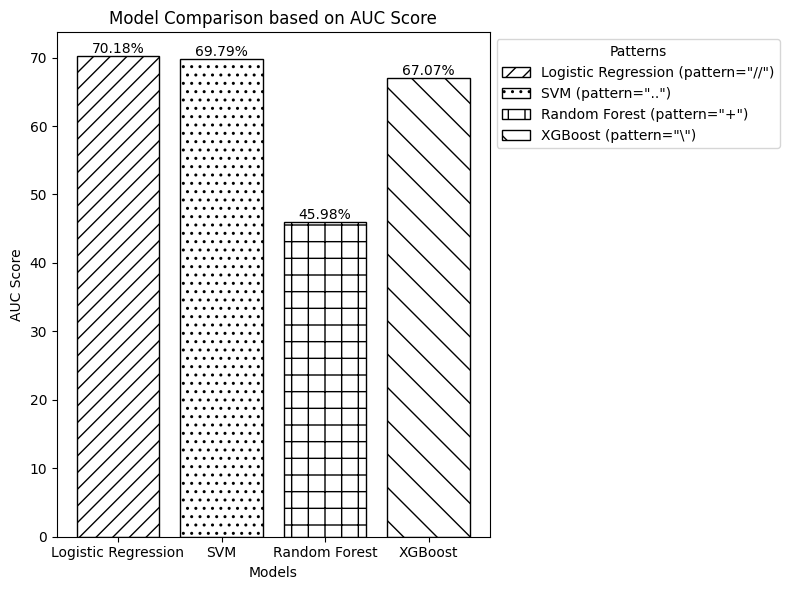

In [85]:
import matplotlib.pyplot as plt

#AUC score
auc_lgr = roc_auc_score(y_test, y_prob_lgr[:, 1]) * 100
auc_svm = roc_auc_score(y_test, y_prob_svm[:, 1]) * 100
auc_rf = roc_auc_score(y_test, y_prob_rf[:, 1]) * 100
auc_xgb = roc_auc_score(y_test, y_prob_xgb[:, 1]) * 100


# Create a DataFrame ##'Gaussian Naive Bayes'
data = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost'],
    'AUC Score': [auc_lgr, auc_svm, auc_rf,auc_xgb]
}
score_table_df = pd.DataFrame(data)

# Score Table
print(score_table_df)
print('=====================================')

# Create Bar Chart
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], f'{y[i]:.2f}%', ha='center', va='bottom')

auc_values = [auc_lgr, auc_svm, auc_rf,auc_xgb]
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']
hatch_patterns = ['//', '..', '+','\\']

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = []
for i, model in enumerate(models):
    bar = plt.bar(model, auc_values[i], hatch=hatch_patterns[i], edgecolor='black',
            facecolor='white', label=f'{model} (pattern="{hatch_patterns[i]}")')
    bars.append(bar)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('Model Comparison based on AUC Score')
addlabels(models, auc_values)

plt.legend(title='Patterns', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [86]:
# AUC scores for each model
auc_scores = {
    "Logistic Regression": auc_lgr,
    "SVM": auc_svm,
    "Random Forest": auc_rf,
    "XGBoost": auc_xgb,
}

# Accuracies for training and test sets for each model
accuracy_scores = {
    "Logistic Regression": {"train": train_acc_lgr, "test": test_acc_lgr},
    "SVM": {"train": train_acc_svm, "test": test_acc_svm},
    "Random Forest": {"train": train_acc_rf, "test": test_acc_rf},
    "XGBoost": {"train": train_acc_xgb, "test": test_acc_xgb},
   # "Gaussian Naive Bayes": {"train": train_acc_gnb, "test": test_acc_gnb}
}


# Filter models where test accuracy is greater than training accuracy
filtered_models = {model: acc for model, acc in accuracy_scores.items() if acc['test'] > acc['train']}

# From the filtered models, select the one with the best AUC score
final_model = max(filtered_models, key=lambda m: auc_scores[m], default=None)

# Find the best performing model based on AUC
best_model_auc = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_model_auc]

if final_model:
    print(f"The final selected model is {final_model} with an AUC of {auc_scores[final_model]:.2f}%.")
    print(f"Training Accuracy: {accuracy_scores[final_model]['train']:.2f}, Test Accuracy: {accuracy_scores[final_model]['test']:.2f}")
else:
    print("No model meets the criteria of highest AUC score with test accuracy greater than training accuracy.")

# Additional information
print("\nAdditional Information:")
print(f"Best Model by AUC: {best_model_auc} with an AUC of {best_auc:.2f}%")
for model, acc in filtered_models.items():
    print(f"{model} - Model with Test Accuracy > Training Accuracy: Training Accuracy: {acc['train']:.2f}, Test Accuracy: {acc['test']:.2f}")


The final selected model is Logistic Regression with an AUC of 70.18%.
Training Accuracy: 0.76, Test Accuracy: 0.77

Additional Information:
Best Model by AUC: Logistic Regression with an AUC of 70.18%
Logistic Regression - Model with Test Accuracy > Training Accuracy: Training Accuracy: 0.76, Test Accuracy: 0.77
SVM - Model with Test Accuracy > Training Accuracy: Training Accuracy: 0.76, Test Accuracy: 0.77


## ***Analyzing the Best Model***

## ***Final Model Selection***

In [87]:
from sklearn.metrics import classification_report

# Array
predictions_map = {
    1: y_pred_lgr,  # Logistic Regression
    2: y_pred_svm,  # SVM
    3: y_pred_rf,   # Random Forest
    4: y_pred_xgb,  # XGBoost
}

# Input the final model
user_input = int(input("Enter the key for the final model (1: LGR, 2: SVM, 3: RF, 4: XGB): "))

# Select the final predictions based on user input
final_predictions = predictions_map.get(user_input)

# Generate and print the classification report
if final_predictions is not None:
    print("Classification Report for the Final Model:")
    print(classification_report(y_test, final_predictions))
else:
    print("Invalid selection. Please enter a valid key.")


Enter the key for the final model (1: LGR, 2: SVM, 3: RF, 4: XGB): 1
Classification Report for the Final Model:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       105
           1       0.56      0.16      0.24        32

    accuracy                           0.04       137
   macro avg       0.19      0.05      0.08       137
weighted avg       0.13      0.04      0.06       137



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Examining Coefficients

best_lgr_model = grid_search_lgr.best_estimator_
coefficients = pd.DataFrame(zip(X_train_selected.columns, np.transpose(best_lgr_model.coef_)), columns=['Feature', 'Coefficient'])
print(coefficients)

          Feature              Coefficient
0      sprc_close    [-21.413786637193585]
1          sma_10     [-7.176602580343513]
2           ema_5      [20.45359693894577]
3             obv    [-0.5060159268535338]
4       bb_medium     [4.5103647577455455]
5  resource_close  [-0.025487548020701946]
6       bcp_close    [-0.4643022867409224]


In [ ]:
#  Class Probabilities and Prediction
probability = best_lgr_model.predict_proba(X_test_selected)
print(probability[:10])


[[0.72466449 0.27533551]
 [0.78325783 0.21674217]
 [0.38956647 0.61043353]
 [0.78325522 0.21674478]
 [0.62872127 0.37127873]
 [0.82737055 0.17262945]
 [0.70699523 0.29300477]
 [0.57387889 0.42612111]
 [0.77101434 0.22898566]
 [0.91911516 0.08088484]]


In [ ]:
# Predict the class label
predicted = best_lgr_model.predict(X_test_selected)
print(predicted)

[-1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
# Analyzing classifier predictions based on probability
prediction_analysis = pd.DataFrame({
    "Probability of -1": probability[:, 0],
    "Probability of 1": probability[:, 1],
    "Predicted Class": predicted
})

prediction_analysis['Classifier Prediction'] = prediction_analysis['Predicted Class'].apply(lambda x: 1 if x > 0.5 else -1)
print(prediction_analysis)


     Probability of -1  Probability of 1  Predicted Class  \
0             0.724664          0.275336               -1   
1             0.783258          0.216742               -1   
2             0.389566          0.610434                1   
3             0.783255          0.216745               -1   
4             0.628721          0.371279               -1   
..                 ...               ...              ...   
136           0.913222          0.086778               -1   
137           0.733268          0.266732               -1   
138           0.763585          0.236415               -1   
139           0.604697          0.395303               -1   
140           0.995108          0.004892               -1   

     Classifier Prediction  
0                       -1  
1                       -1  
2                        1  
3                       -1  
4                       -1  
..                     ...  
136                     -1  
137                     -1  
138   